This notebook estimate the space-time correlation in a network of meV axion detectors due to wave interference. Following [Lam Hui's review on wave dark matter](https://arxiv.org/abs/2101.11735).

Apr 18, 2025

In [1]:
# Plotting style
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = [4, 3]
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = 9
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

Eqn 50. says "With a network of detectors, one can measure the correlation function
in space-time":
$$
\left\langle\phi\left(t_1, \vec{x}_1\right)^2 \phi\left(t_2, \vec{x}_2\right)^2\right\rangle-\left\langle\phi^2\right\rangle^2=\frac{\bar{\rho}^2}{m^4}\left(1+\frac{k_0^4\left(t_1-t_2\right)^2}{16 m^2}\right)^{-3 / 2} \exp \left(-\frac{4 k_0^2 m^2\left|\vec{x}_1-\vec{x}_2\right|^2}{16 m^2+k_0^4\left(t_1-t_2\right)^2}\right)
$$

Note that 

$$
\lambda_{\mathrm{dB}} \equiv \frac{2 \pi}{m v}=0.48 \mathrm{kpc}\left(\frac{10^{-22} \mathrm{eV}}{m}\right)\left(\frac{250 \mathrm{~km} / \mathrm{s}}{v}\right)=1.49 \mathrm{~km}\left(\frac{10^{-6} \mathrm{eV}}{m}\right)\left(\frac{250 \mathrm{~km} / \mathrm{s}}{v}\right)
$$

In [111]:
import numpy as np

def space_time_corr(dt_s, dx_m, avgRho_gevCm3=0.3, m_ev=1e-3, v_kmS=250):
    """
    Compute the space-time correlation function for scalar field phi.

    Parameters:
    - dt_s: time difference t1 - t2 [s]
    - dx_m: spatial separation |x1 - x2| [m]
    - avgRho_gevCm3: average DM density [GeV/cm^3]
    - m_ev: particle mass [eV]
    - v_kmS: velocity ispersion of dark matter around earth [km/s]

    Returns:
    - correlation value [eV^4]
    """
    # Physical constants
    GeV_to_eV = 1e9
    cm3_to_m3 = 1e6
    # https://sherwingroup.itst.ucsb.edu/internal/unit-conversion/
    cm_to_eV = 1/(0.000124) 
    m_to_cm = 1e2
    s_to_eV = 1/(1.52e24*GeV_to_eV)

    # Convert distance to eV
    dx = dx_m * m_to_cm * cm_to_eV

    # Convert avgRho to eV^4 using natural units
    avgRho_ev4 = avgRho_gevCm3 * GeV_to_eV / (cm_to_eV**3)
    avgRho = avgRho_ev4

    # Convert mass to eV, then square and fourth power
    m = m_ev
    m2 = m**2
    m4 = m**4

    # Compute k0 = 2π / λ
    lambdaDb_m = 1490 * (1e-6/m_ev) * (v_kmS/250) # by Eqn. 1
    lambdaDb = lambdaDb_m * m_to_cm * cm_to_eV
    k0 = 2 * np.pi / lambdaDb
    k0_2 = k0**2
    k0_4 = k0**4

    # Convert second to eV^-1
    dt = dt_s * s_to_eV

    # Denomidnator for both prefactor and exponent
    denom = 16 * m2 + k0_4 * dt**2

    # Prefactor
    prefactor = (avgRho**2) / m4 * (1 + (k0_4 * dt**2) / (16 * m2))**(-1.5)

    
    # Exponential part
    exponent = - (4 * k0_2 * m2 * dx**2) / denom

    # Final correlation value
    return prefactor * np.exp(exponent)

def rel_space_time_corr(dt_s, dx_m, avgRho_gevCm3=0.3, m_ev=1e-3, v_kmS=250):
    """
    Compute the space-time correlation function for scalar field phi relative to average DM density.
    
    Returns:
    - relative correlation value [1]
    """
    # Convert avgRho to eV^4 using natural units
    GeV_to_eV = 1e9
    cm_to_eV = 1/(0.000124) 
    avgRho_ev4 = avgRho_gevCm3 * GeV_to_eV / cm_to_eV**3
    avgRho = avgRho_ev4
    
    return space_time_corr(dt_s, dx_m, avgRho_gevCm3=0.3, m_ev=1e-3, v_kmS=250) / avgRho

Text(0, 0.5, 'Relative Space-time Correlation')

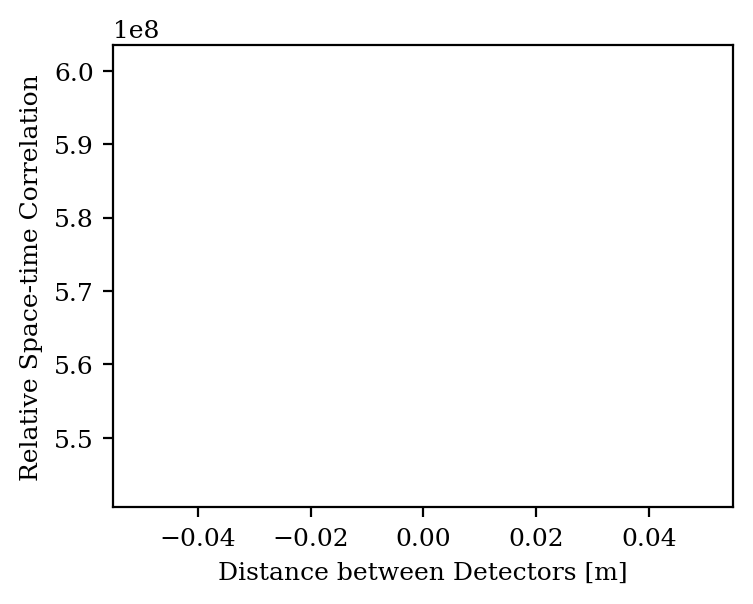

In [112]:
dx_m_array = np.logspace(1, 3, 100)

plt.plot(
    dx_m_array,
    rel_space_time_corr(dt_s=1e-3, dx_m=dx_m_array, m_ev=1e-10)
)

plt.xlabel("Distance between Detectors [m]")
plt.ylabel("Relative Space-time Correlation")

Text(0, 0.5, 'Relative Space-time Correlation')

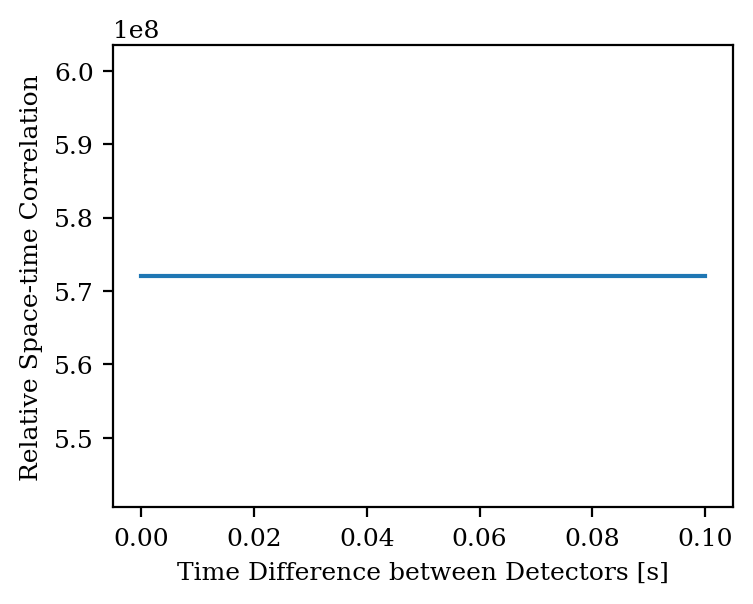

In [118]:
dt_s_array = np.logspace(-8, -1, 100)

plt.plot(
    dt_s_array,
    rel_space_time_corr(dt_s=dt_s_array, dx_m=0, m_ev=1e-10)
)

plt.xlabel("Time Difference between Detectors [s]")
plt.ylabel("Relative Space-time Correlation")

Text(0, 0.5, 'Space-time Correlation')

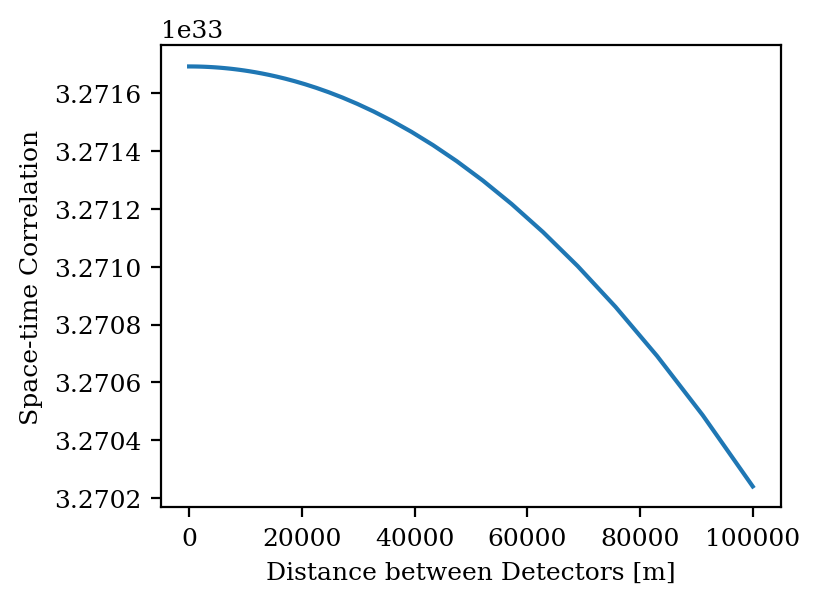

In [115]:
dx_m_array = np.logspace(1, 5, 100)
plt.plot(
    dx_m_array,
    space_time_corr(dt_s=1e-3, dx_m=dx_m_array, m_ev=1e-10)
)

plt.xlabel("Distance between Detectors [m]")
plt.ylabel("Space-time Correlation")